# Ejercicios de entranamiento con opencv

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Lee la imagen peppers.png (escala de grises) y visualizala. Aumenta la intensidad de todos los píxeles de la imagen sumando 50 niveles de gris. Vuelve a visualizar y compara el resultado. Realiza la misma operación pero restando 50 a la original

Text(0.5, 1.0, 'Imagen con -50 niveles de gris')

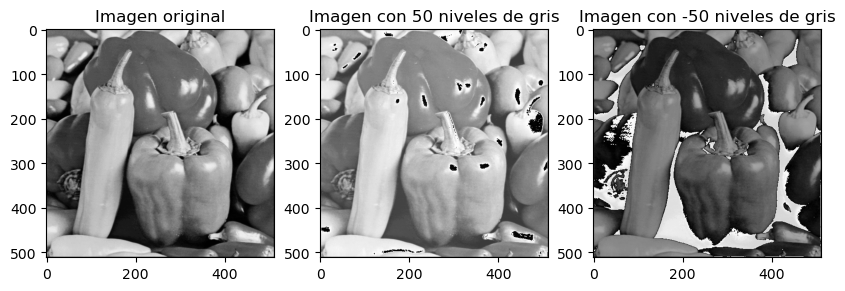

In [2]:
imagen = cv2.imread('images/peppers.jpg',0)


fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Imagen original')

axes[1].imshow(imagen+50, cmap='gray')
axes[1].set_title('Imagen con 50 niveles de gris')

axes[2].imshow(imagen-50, cmap='gray')
axes[2].set_title('Imagen con -50 niveles de gris')

Repite el ejercicio anterior pero esta vez busca información sobre la función add de opencv. Compara los resultados

Text(0.5, 1.0, 'Imagen con -50 niveles de gris')

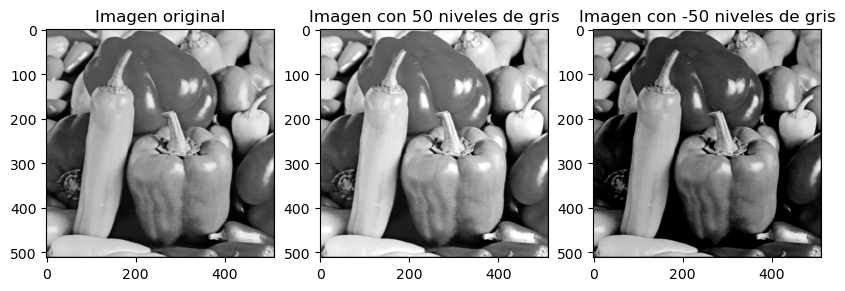

In [3]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Imagen original')

axes[1].imshow(cv2.add(imagen,50), cmap='gray')
axes[1].set_title('Imagen con 50 niveles de gris')

axes[2].imshow(cv2.subtract(imagen,50), cmap='gray')
axes[2].set_title('Imagen con -50 niveles de gris')

Leer la imagen peppers.png, obtener su negativo, visualizarla y guardarla.

Text(0.5, 1.0, 'Negativo con cv2')

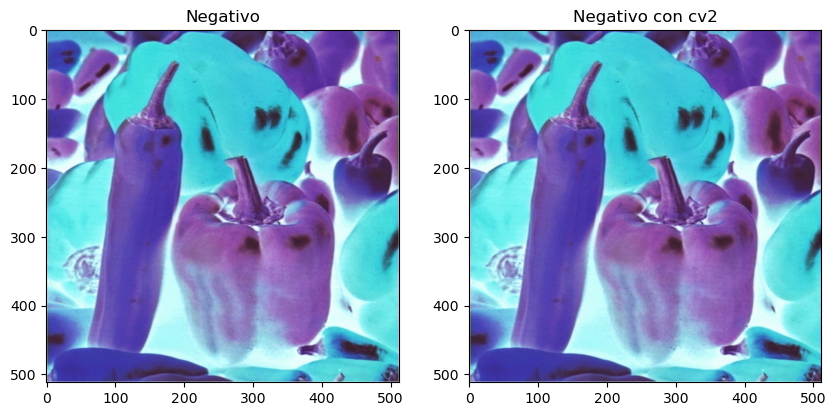

In [ ]:
imagen_color = cv2.imread('images/peppers.jpg')
negativo_aux = 255 - imagen_color


negativo = cv2.cvtColor(negativo_aux, cv2.COLOR_BGR2RGB)

fig,axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(negativo)
axes[0].set_title('Negativo')

negativo_cv_aux = cv2.bitwise_not(imagen_color)
negativo_cv = cv2.cvtColor(negativo_cv_aux, cv2.COLOR_BGR2RGB)
axes[1].imshow(negativo_cv)
axes[1].set_title('Negativo con cv2')




Generar desde cero dos imágenes de 256x256 píxeles y rellenarlas como se indica. Visualizarlas y escribirlas en disco

<img src="images/difuminado_1.png">
<img src="images/difuminado_2.png">

True

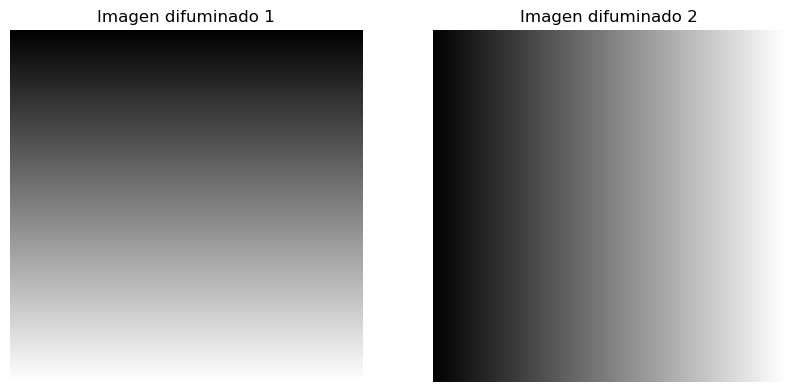

In [ ]:
H, W = 256, 256
columna = np.linspace(0, 255, H)[:, None] #(255,1)
img = np.repeat(columna, W, axis=1) #de esta forma repite por columnas, si quisieramos por fila entonces seria axis = 0

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen difuminado 1')

columna = np.linspace(0,255,H)[None,:]
img2 = np.repeat(columna, W, axis=0) #por tanto ahora repetimos la fila

axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen difuminado 2')

#Guardar las imagenes 256x256
cv2.imwrite('img1-256x256.png', img)
cv2.imwrite('img2-256x256.png', img2)




Volver a realizar el ejercicio anterior pero esta vez haciendo que las imágenes tengan dimensión 512x512

[ WARN:0@1580.344] global loadsave.cpp:1063 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


True

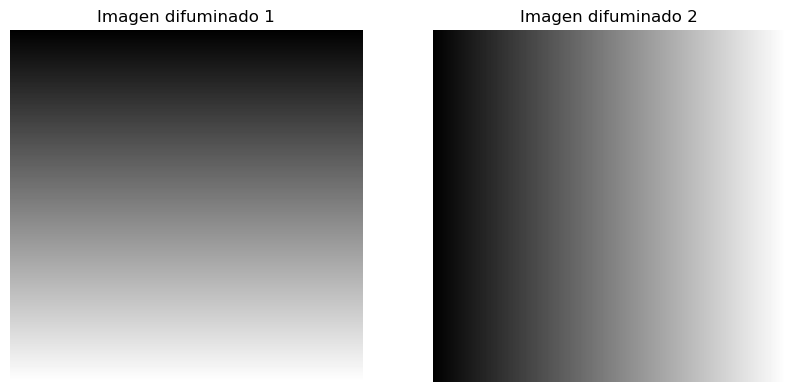

In [33]:
H, W = 512, 512
columna = np.linspace(0, 255, H)[:, None]  # de arriba (0) a abajo (255)
img = np.repeat(columna, W, axis=1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen difuminado 1')

fila = np.linspace(0,255,H)[None,:]
img2 = np.repeat(fila, W, axis=0)

axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen difuminado 2')

#Guardamos las iamagenes 512x512
cv2.imwrite('img1-512x512.png', img)
cv2.imwrite('img2-512x512.png', img2)


Crea dos imágenes binarias (blanco y negro, 0 o 255) de 300x300 píxeles. La primera debe ser un cuadrado blanco de 100x100 píxeles en el centro sobre un fondo negro. La segunda debe ser un círculo blanco de radio 50 píxeles también en el centro sobre un fondo negro. 
Realiza las operaciones lógicas AND, O y  XOR entre estas dos imágene. Nota: sabemos que un píxel en las coordenadas (x,y) pertenece al círculo de radio r centro en (cx, cy) si $(x-cx)^2+(y-cy)^2<= r^2$)s

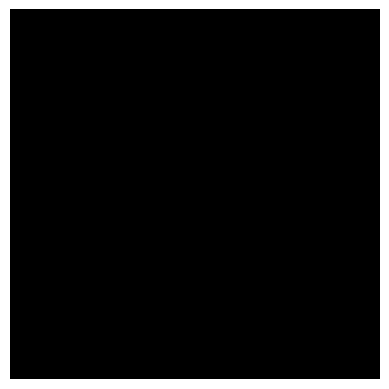

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


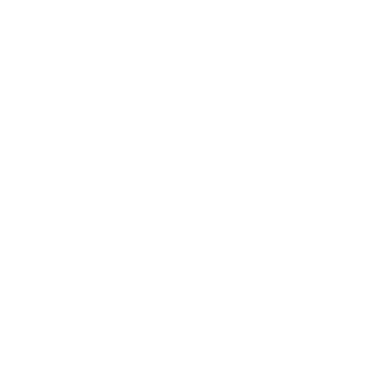

In [16]:
img = np.zeros((300,300), dtype=np.uint8)
img2 = np.ones((300,300), dtype=np.uint8)*255

img2_aux = cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)




plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

print(img2)


plt.imshow(img2_aux,cmap='gray') 
plt.axis('off')
plt.show()

#Tengo 2 opciones, o usar el vmin y vmax ya que sin el traslado de bgr a rgb no funciona bien o usar el mismo


Leer una imagen en color y obtener su versión en escala de grises asignando, a cada pixel, la media de intensidades de rojo, verde y azul. 

Leer y visualizar una imagen. Generar una nueva imagen que en lugar de tener 256 niveles de gris tenga solamente 8:
- Si intensidad [0,31]-> asigno intensidad 0
- Si intensidad [32,63] -> asigno 36
- Si intensidad [64,95] -> asigno 72
- Si intensidad [96,127] -> asigno 108
- Si intensidad [128,159] -> asigno 144
- Si intensidad [160,191] -> asigno 180
- Si intensidad [192,223] -> asigno 216
- Si intensidad [224,255] –> asigno 255


Volver a realizar el ejercicio 4 pero esta vez utilizando únicamente 4 niveles de gris: 0, 85, 170 y 255.

Crear una imagen de dimensión 300x300 completamente roja. Visualizarla con opencv y con matplotlib. Realiza los cambios necesarios para visualizarla bien con matplotlib. Luego guárdala en un archivo llamado roja.png